# NNIA Assignment 7

## <font color="red">Happy</font> <font color="green">Holidays</font>!!

**DEADLINE: 05.01.2024 0800 CET**
- Philipp Hawlitschek 7043167 (phha00002)
- William LaCroix 7038732 (wila00001)
- Hours of work per person: 3

# Submission Instructions
**IMPORTANT** Please make sure you read the following instructions carefully. If you are unclear about any part of the assignment, ask questions **before** the submission deadline. All course-related questions can be addressed on the course **CMS Forum**.

* Assignments are to be submitted in a **team of 2-3**. It is fine to submit first **2** assignments without a team, but starting from the **3rd** assignment it is not allowed.
* Please include your **names**, **ID's**, **CMS usernames**, and **approximate total time spent per person** at the beginning of the Notebook in the space provided
* Make sure you appropriately comment your code wherever required.
* Do **not** submit any data or cache files (e.g. `__pycache__`).
* Upload the **zipped** folder (`.zip` is the only accepted extension) in **CMS**.
* Only **one** member of the group should make the submission.
* **Important** please name the submitted zip folder as: `Name1_id1_Name2_id2(_Name3_id3).zip`. The Jupyter Notebook should also be named: `Name1_id1_Name2_id2.ipynb`. This is **very important** for our internal organization repeatedly students fail to do this.

<font color="red">Failure to follow the above instructions will result in point penalties at the discretion of the instructors.</font>

## 1 The Chain Rule in Computational Graphs (2 pts)

The structure of neural networks is often represented using computational graphs to make complex operations easier to understand. If you are unfamiliar with computational graphs, read this [Intro to Computational Graphs in Deep Learning](https://www..org/computational-graphs-in-deep-learning/) and/or watch these videos on [Computational Graphs](https://youtu.be/hCP1vGoCdYU) and [Derivatives on Compuataional Graphs](https://youtu.be/nJyUyKN-XBQ) by DeeplearningAI before attempting this exercise.  

Below is an example of a simple computation graph. Using this, write down the expressions (by applying the chain rule) and calculate the final values for the following partial derivatives:

1.   $\frac{\partial e}{\partial b}$
2.   $\frac{\partial e}{\partial a}$

<img src="computgraph.png" alt="Computional Graph" width=641/>

## 1 <font>To Do</font>

(going the backward direction from right to left)

- 2nd layer:
1. $\frac{\partial e}{\partial c} = d$
2. $\frac{\partial e}{\partial d} = c$

- 1st layer:
1. $\frac{\partial c}{\partial a} = 1$
2. $\frac{\partial c}{\partial b} = 1$
3. $\frac{\partial d}{\partial b} = 2b$

- <b>Final Values</b>:
1. $\frac{\partial e}{\partial b} = \frac{\partial e}{\partial c} * \frac{\partial c}{\partial b} + \frac{\partial e}{\partial d} * \frac{\partial d}{\partial b} = d + 2bc$
2. $\frac{\partial e}{\partial a} = \frac{\partial e}{\partial c} * \frac{\partial c}{\partial a} = d * 1 = d$

## 2. Neural Network Implementation: Training, Forward Pass, and Backpropagation  (8 pts)

At this point you already got familiar with the basic architecture of neural networks: hidden layers, activation
functions, loss functions, forward pass and back-propagation.

It's time to put it all together!

We have been playing around with PyTorch for a while. Although it is nice and convenient, we want to have a deeper understanding of what is really going on under the hood. For this purpose, we will create and train a simple 2-layer neural network from scratch using simple matrix operations and what we have learned so far.

In this exercise, we will work with [the PyTorch Datasets Class](https://pytorch.org/vision/stable/datasets.html) to obtain
[the CIFAR10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html). Our goal is to benchmark our simple neural network by classifying the images in this dataset into their proper classes.

### 2.1 The CIFAR10 dataset (2 pts)

#### 2.1.1 Getting to know the Dataset (0.5 pts)
Have a look at [the CIFAR10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html) and answer the following
questions:

1. What is the size of the dataset? Is it already divided into train and test sets?
2. What is the input? What shape does it have?
3. What shape would the output have?
4. What classes are represented in the dataset?

### 2.1.1 <font> Answer </font>

1. 60,000 images of 10 classes, each class has 6,000 instances. The dataset is divided into five training batches and one test batch.
2. One training batch contains 10,000 pictures. Each picture is stored as a numpy array of length 3072 with entries of type uint8. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
3. It's the label for one of the 10 classes, modeled as integer values from 0-9.
4. airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

#### 2.1.2 Pre-Processing  (0.5 pts)

Let's load the dataset into our workspace. We will do that by creating an instance of class [`torchvision.datasets.CIFAR10`](https://pytorch.org/vision/stable/datasets.html#cifar). Have a look at the parameters of the class:
- `root`
- `train`
- `download`
- `transform`
- `target_transform`

Make sure you understand what each of them means.

The input data that we load with torchvision are PIL images. We need to do some preprocessing before we can use the data for training. We can do that by passing an argument to the parameter `transform`.

1. We need to transform PIL images to tensors. **TODO**: find the corresponding function in `torchvision.transforms`.
2. It is a good practice to normalize your data before feeding it into the network. **TODO**: find the corresponding function in `torchvision.transforms`.
3. Right now each image has 3 dimensions: number of rows, number of columns and number of color channels (the latter is 3 in our case, as those are RGB images. If interested, you can read more about this in [Image Processing in Python Numpy](https://www.pythoninformer.com/python-libraries/numpy/numpy-and-images/)). We want to reshape each datapoint to be a flattened vector with $\text{size} = n_{row} \cdot n_{col} \cdot n_{channels}$. **TODO**: create a class that performs this function. 

#### 2.1.3 (1 pt)
Now we have our train and test sets.
However, we would like to be able to train different models with different hyperparameters in the future and compare them using a validation set (we will use the hold-out method).
For that we need to split our train data.
Let's use 10% of the data for validation.

For Tasks 1.2 - 1.3, Please **complete the functions** in `solution.py` and run the following cells. Do **NOT** change the code cells below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

# Only run this cell after having completed your code in solution.py or you will get an error!
from solution import get_cifar10_dataset

train_loader, test_loader, val_loader, classes = get_cifar10_dataset()

Files already downloaded and verified
Files already downloaded and verified


#### Verify the data are as expected

The follow code cells are provided for your convenience. Do **NOT** change

In [3]:
images, labels = next(iter(train_loader))

print('images.shape:', images.shape)
print('labels.shape:', labels.shape)

images.shape: torch.Size([128, 3072])
labels.shape: torch.Size([128])


Note that in order to visualize the image, we have to reshape the Tensor back to the $C,H,W$ format.
Because of our manipulation, the image sample is not so clear. However, it's still possible to make out the correct class label for the sample.
(Hint: You should see an image of a deer corresponding to the label the *first* time you run this cell.)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


label: deer


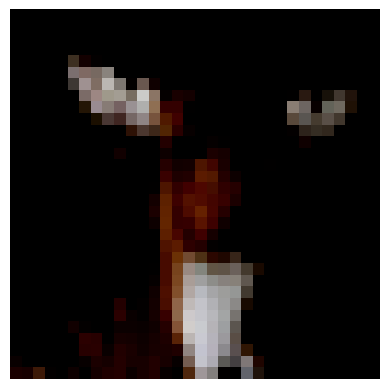

In [4]:
np.random.seed(23)
idx = np.random.randint(0, 128, 1)
plt.axis('off')
plt.imshow(images[idx].reshape((3, 32, 32)).permute((1,2,0)).numpy())
print('label:', classes[labels[idx]])

You should see an image of an airplane below and its label the *first* time you run the cell.
(Hint: if you're seeing something else, did you specify shuffling vs not shuffling option correctly?)

In [5]:
val_images, val_labels = next(iter(val_loader))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([128, 3072])
labels.shape: torch.Size([128])
label: airplane


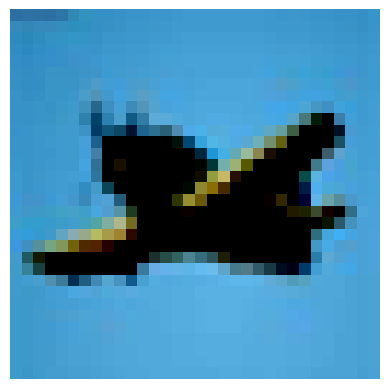

In [6]:
print('images.shape:', val_images.shape)
print('labels.shape:', val_labels.shape)
plt.axis('off')
plt.imshow(val_images[1].reshape((3, 32, 32)).permute((1,2,0)).numpy())
print('label:', classes[val_labels[1]])

### 2.2 The Forward Pass Implementation (2 pts)

In this question we will implement a two-layered a neural network architecture as well as the loss function to train it. For this question, complete the required code in `solution.py`. Refer to the comments in the code to the exact places where you need to fill in the code.
Load the code cell in this notebook to verify your answer.

### The Model Architecture

The diagram below shows the visualization of the model architecture. Please note that the diagram only shows the schematic of the layers, the number of units are *not* representative of the actual sizes of the input, output, and hidden layers.

<img src="AS7NNetwork.png" alt="Model Architecture" width=584/>

Our 2-layer neural network has an input layer and two model layers: a hidden and an output layer. 

The hidden layer consists of 50 units. The input layer and the hidden layer are connected via linear weight matrix $W^{(1)}$ and the bias term $b^{(1)}$. The parameters $W^{(1)}$ and $b^{(1)}$ are to be learnt during training. A linear operation is performed, $W^{(1)}x + b^{(1)}$, resulting in a vector $z^{(2)}$.

It is then followed by a ReLU non-linear activation, applied element-wise on each unit, resulting in the activations $a^{(2)} = \text{ReLU}(z^{(2)})$.
As you know, the ReLU function has the following form:


\begin{align}
\tag{1}
\text{ReLU}(u) = \begin{cases} 
          u, & u \ge 0 \\
          0, & u < 0
       \end{cases}
\end{align}

A similar linear operation is performed on $a^{(2)}$, resulting in $z^{(3)} = W^{(2)}a^{(2)} + b^{(2)}$; it is followed by the softmax activation to result in $a^{(3)} =\text{softmax}(z^{(3)})$. The softmax function is defined
by:

\begin{align}
\tag{2}
\text{softmax}(u_{(i)}) = \frac{\exp^{u_{i}}}{\sum_{j}\exp^{u_{j}}}
\end{align}

In equation form, our network is as described below:

\begin{align}\tag{3}
a^{(1)} &= x \\
\tag{4}
z^{(2)} &= W^{(1)}a^{(1)} +b^{(1)}\\
\tag{5}
a^{(2)} &=\text{ReLu}(z^{(2)})\\
\tag{6}
z^{(3)} &= W^{(2)}a^{(2)} +b^{(2)}\\
\tag{7}
f_{\theta}(x) &:= a^{(3)} =\text{softmax}(z^{(3)})
\end{align}

The network takes as input a flattened vector and outputs a vector where each entry in the output $f_{k}(x)$ representing the probability of image $x$ corresponding to the class $k$. We indicate all the network parameters by $θ = (W^{(1)},b^{(1)},W^{(2)},b^{(2)})$.

For the neural network to learn the parameters $\theta = (W^{(1)}, b^{(1)}, W^{(2)}, b^{(2)})$ to fit to the given data and label, we minimize the loss function. A popular choice of the loss function for training a neural network for a multi-class classification task is the cross-entropy loss. 

For a single input sample $x_{i}$, with label $y_{i}$, the loss function is defined as:


\begin{align}
\tag{8}
J(\theta, x_{i}, y_{i}) &= −\log P(Y = y_{i}, X = x_{i})\\
\tag{9}
&= − \log f_{\theta}(x_{i})_{y_{i}}\\
\tag{10}
&= − \log\text{softmax}(z^{(3)})_{y_{i}}\\
\tag{11}
J(\theta, x_{i}, y_{i}) &= −\log \bigg[ \frac{\exp^{z^{(3)}_{y_{i}}}}{\sum^{K}_{j}\exp^{z^{(3)}_{j}}} \bigg]
\end{align}


Averaging over the whole training set, we get:

\begin{align}
\tag{12}
J(\theta, \{x_{i}, y_{i}\}^{N}_{i = 1}) &= \frac{1}{N} \sum^N_{i = 1} −\log \bigg[ \frac{\exp^{z^{(3)}_{y_{i}}}}{\sum^{K}_{j}\exp^{z^{(3)}_{j}}} \bigg]
\end{align}


where $K$ is the number of classes. Note that if the model has perfectly fitted to the data (i.e. $f_{\theta}^{k}(x_{i}) = 1$ whenever $x_{i}$ belongs to class $k$ and $0$ otherwise), then $J$ attains the minimum of $0$.

Apart from trying to correctly predict the label, we have to prevent overfitting the model to the current training data for better generalization to unseen data. We add an $L_{2}$ regularisation term over the model parameters $\theta$. Specifically, the loss function is defined by:


\begin{align}
\tag{13}
\tilde{J}(\theta) &= \frac{1}{N} \sum^N_{i = 1} −\log \bigg[ \frac{\exp^{z^{(3)}_{y_{i}}}}{\sum^{K}_{j}\exp^{z^{(3)}_{j}}} \bigg]
+ \lambda \big( \Vert W^{(1)}\Vert^{2}_{2} + \Vert W^{(2)} \Vert^{2}_{2} \big)
\end{align}


where $\Vert \cdot \Vert^{2}_{2}$ is the squared $L_{2}$ norm. For example,


\begin{align}
\tag{14}
\Vert W^{(1)} \Vert^{2}_{2} &= \sum^{R}_{p=1}\sum^{S}_{q=1}{W^{(1)}_{pq}}^{2}, \text{where }R = \text{hidden size},S = \text{input size}
\end{align}

**Implement the code in `solution.py`** for the *forward pass* of model up to the *loss function* as described above. You are required to implement **Eq. 3 to 7** as well as **Eq. 11 - 13**.

To be able to train the above model on large datasets, with larger layer widths, the code has to be very efficient. To do this you should **avoid** using any python `for` loops in the forward pass and instead use matrix/vector multiplication in the `numpy` library.

Run the cells below to verify your answer. Do not change any of the codes below. If you encounter errors, revise your work in `solution.py`.

In [94]:
%load_ext autoreload
%autoreload 2
from solution import NeuralNetworkModel
from utils import correct_scores, correct_loss

input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
num_samples = 5

toy_net = NeuralNetworkModel(input_size, hidden_size, num_classes)
scores = toy_net.loss(val_images[:num_samples,:])

assert np.allclose(correct_scores(), scores)

print(f'Difference between your scores and correct scores:\n'
      f'{np.sum(np.abs(scores - correct_scores()))}\n'
      f'Scores difference < 1e-5: {np.sum(np.abs(scores - correct_scores())) < 1e-5}\n')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Difference between your scores and correct scores:
7.520315508921516e-06
Scores difference < 1e-5: True



In [96]:
loss, _ = toy_net.loss(val_images[:num_samples,:], val_labels[:num_samples], reg=0.05)

print(f'Correct loss: {correct_loss()}\n'
      f'Difference between your loss and correct loss:\n'
      f'{(np.abs(loss - correct_loss())).sum()}\n'
      f'Loss difference < 1e-5: {(np.abs(loss - correct_loss())).sum() < 1e-5}\n')

Z3 LOOKS LIKE: tensor([[-1.3612e-06, -2.0952e-06, -6.7992e-07,  8.2885e-07,  1.5967e-06,
          2.6600e-07,  1.0750e-06, -3.3599e-06, -2.4706e-06,  4.5892e-07],
        [-8.3932e-08,  2.6200e-06,  2.0676e-06,  1.5328e-06, -2.8109e-07,
          2.4866e-06,  1.7052e-06, -2.1075e-06, -4.6284e-07, -9.6787e-07],
        [-4.5810e-07, -7.1265e-08,  2.3797e-08, -3.6583e-07,  1.2032e-07,
         -1.2967e-06,  2.2439e-07, -2.2859e-06, -1.9932e-06, -1.8072e-06],
        [-9.9532e-07,  5.2251e-07, -1.1102e-06,  1.7875e-06,  1.1171e-06,
          1.3938e-06,  2.5540e-06,  3.3795e-07,  1.4343e-07,  5.9568e-07],
        [-5.0032e-07, -1.6986e-08,  4.1697e-07,  7.9852e-07,  1.0989e-06,
         -5.3813e-10, -4.2203e-08, -3.2468e-06, -7.5269e-08, -2.1892e-06]],
       dtype=torch.float64)
J LOOKS LIKE: tensor([[1.7094, 1.7094, 1.7094, 1.7094, 1.7094, 1.7094, 1.7094, 1.7094, 1.7094,
         1.7094],
        [1.7094, 1.7094, 1.7094, 1.7094, 1.7094, 1.7094, 1.7094, 1.7094, 1.7094,
         1.7094],

### 2.3 Backpropagation (4 pts + 2 Bonus pts)

When we train our model, we are trying to solve the following minimization function via stochatic gradient descent:

$$ \begin{align}
\tag{15}
\min_{\theta} \tilde J (\theta) 
\end{align}$$

To find the gradients $\nabla_{\theta} \tilde J(\theta)$, we perform backpropagation from the output layer to the parameters $\theta$ at different layers. Backpropagation is simply a sequential application of chain rule as covered in the lecture and your course materials. For each parameter $\theta$ in the model we want to compute the effect that parameter has on the loss, we compute the derivatives of the loss w.r.t each model parameter.

#### 2.3.1 Gradient Calculation (2 pts + 2 Bonus pts)

Complete 2 of the following derivative calculations. For 2 Bonus points, complete the rest of them.

1. Verify that the loss function defined in **Eq.12** has the gradient w.r.t $ z^{(3)}$ as below (i.e. derive the following gradient):

\begin{align}
\tag{16}
\frac{\delta J}{\delta z^{(3)}}(\{x_i,y_i\}^{N}_{i=1}) &= \dfrac{1}{N}\text{softmax}(z^{(3)}) - \Delta \\
\end{align}

where $\Delta$ is a matrix of $N × K$ dimensions with:

\begin{align}
\tag{17}
\Delta_{i,j} = \begin{cases} 
          1, & \text{if }  y_{i} = j \\
          0, & \text{otherwise}
       \end{cases}
\end{align}

2. Verify that the partial derivative of the loss w.r.t $W^{(2)}$ is:

\begin{align}
\tag{18}
\frac{\delta J}{\delta W^{(2)}}(\{x_i,y_i\}^{N}_{i=1}) &= \frac{\delta J}{\delta z^{(3)}} \cdot \frac{\delta z^{(3)}}{\delta W^{(2)}} \\
\tag{19}
&= \dfrac{1}{N} \big(\text{softmax}(z^{(3)}) - \Delta \big) \cdot a^{(2)}
\end{align}

3. Verify that the regularized loss in **Eq. 13** has the following derivative w.r.t $W^{(2)}$:

\begin{align}
\tag{20}
\frac{\delta \tilde J}{\delta W^{(2)}} = \dfrac{1}{N} \big(\text{softmax}(z^{(3)}) - \Delta \big) \cdot a^{(2)} + 2\lambda W^{(2)}
\end{align}

4. Dervive the expressions for the derivatives of the regularized loss in *Eq.13* w.r.t *$W^{(1)}, b^{(1)}, b^{(2)}$*.  These are referred to as Eq. 21-23 in `solution.py`. You should at least try to complete this as you will need to come up with the formulas for these derivatives to complete the next section, 2.3.2.


**Note:** Activation functions are applied *element-wise*, so the derivative of an activation function has the shape as the original input to the activation function. E.g. if we have $f(a)$, where $a \in \mathbb{R}^{n \times m}$, then $f(a) \in \mathbb{R}^{n \times m}$ and $(\nabla_{a} f(a)) \in \mathbb{R}^{n \times m}$. Hence, the derivative of the activation function is also applied **element-wise**.

### 2.3.1 <font color="red"> Answer </font>

1. 
2.
3.
4.

#### 2.3.2 Backpropagation Implementation (2 pts)

Using the expressions you obtained for the derivatives of the loss w.r.t model parameters, **implement** the back-propagation algorithm in the file `solution.py`. (i.e. **Eq. 16, 17, 19, 20, 21-23**)
Note that even though normally you would use PyTorch's autograd for this, you should write the optimization formulas without it here.

In [ ]:
%load_ext autoreload
%autoreload 2

from solution import NeuralNetworkModel
from utils import eval_numerical_gradient, rel_error, init_toy_data

# computing the numerical gradient for W1 and b1 on the actual data would take way too long with the eval_numerical_gradient function
# hence the toy data
X_sm, y_sm = init_toy_data()
toy_net_small = NeuralNetworkModel(input_size=4, hidden_size=10, output_size=3, std=1e-1)
sm_loss, sm_grads = toy_net_small.loss(X_sm, y_sm, reg=0.05)

for param_name in sm_grads:
    f = lambda W: toy_net_small.loss(X_sm, y_sm, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, toy_net_small.params[param_name], verbose=False)
    print(f'{param_name} max relative error: {rel_error(param_grad_num, sm_grads[param_name])}; '
          f'error < 1e-8: {rel_error(param_grad_num, sm_grads[param_name]) < 1e-8}')